Inferential Statistics
- Inferential statistics allow us to make predictions or generalizations about a population based on a sample of data.

1. Sampling
- Sampling is the process of selecting a subset (sample) from a larger group (population). There are two common methods:

- **Simple Random Sampling**: Every individual has an equal chance of being selected.
- **Stratified Sampling**: The population is divided into subgroups (strata), and samples are taken proportionally from each group.

**Code Example for Simple Random Sampling:**

In [1]:
import pandas as pd
import random

# Population data: Assume a group of 20 people
population = list(range(1, 21))  # Numbers 1 to 20 represent people

# Convert population to DataFrame
df_population = pd.DataFrame(population, columns=['Person'])

# Simple Random Sampling: Pick 5 people randomly
sample_size = 10

# Option 1: Sampling without duplicates (replace=False)
sample_without_duplicates = df_population.sample(n=sample_size, replace=False)

# Option 2: Sampling with duplicates (replace=True)
sample_with_duplicates = df_population.sample(n=sample_size, replace=True)

# Print results
print("Population:")
print(df_population)
print("\nSimple Random Sample without duplicates (no replacement):")
print(sample_without_duplicates)
print("\nSimple Random Sample with duplicates (with replacement):")
print(sample_with_duplicates)

Population:
    Person
0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20

Simple Random Sample without duplicates (no replacement):
    Person
0        1
13      14
12      13
14      15
7        8
1        2
5        6
19      20
6        7
2        3

Simple Random Sample with duplicates (with replacement):
    Person
15      16
13      14
16      17
9       10
11      12
5        6
12      13
2        3
19      20
5        6


**Code Example for Stratified Sampling:**

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [5]:
condition_A = df['race/ethnicity'] == "group A"
group_A = df[condition_A] #strata A

condition_B = df['race/ethnicity'] == "group B"
group_B = df[condition_B] #strata B

condition_C = df['race/ethnicity'] == "group C"
group_C = df[condition_C] #strata C

condition_D = df['race/ethnicity'] == "group D"
group_D = df[condition_D] #strata D

condition_E = df['race/ethnicity'] == "group E"
group_E = df[condition_E] #strata E

In [6]:
group_A_sample = group_A.sample(n = 10, random_state= 0)
group_B_sample = group_B.sample(n = 10, random_state= 0)
group_C_sample = group_C.sample(n = 10, random_state= 0)
group_D_sample = group_D.sample(n = 10, random_state= 0)
group_E_sample = group_E.sample(n = 10, random_state= 0)

In [7]:
stratified_sample_df = pd.DataFrame()

In [8]:
# stratified_sample_df = stratified_sample_df.append([group_A_sample, group_B_sample, group_C_sample, group_D_sample, group_E_sample])

In [9]:
import pandas as pd

# Example dataset
data = {
    "ID": range(1, 21),
    "Category": ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C',
                 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Stratified Sampling: Sample 2 rows from each category
stratified_sample = df.groupby('Category', group_keys=False).apply(
    lambda x: x.sample(2, replace=False)  # Adjust sample size as needed
)

# Print the original data and the stratified sample
print("Original Dataset:")
print(df)
print("\nStratified Sample:")
print(stratified_sample)

Original Dataset:
    ID Category
0    1        A
1    2        A
2    3        A
3    4        B
4    5        B
5    6        B
6    7        C
7    8        C
8    9        C
9   10        C
10  11        D
11  12        D
12  13        D
13  14        D
14  15        D
15  16        E
16  17        E
17  18        E
18  19        E
19  20        E

Stratified Sample:
    ID Category
1    2        A
0    1        A
3    4        B
5    6        B
6    7        C
9   10        C
12  13        D
14  15        D
15  16        E
19  20        E


<ipython-input-9-18c9abbeed4e>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Category', group_keys=False).apply(


- The groupby('Category') groups the DataFrame by the Category column, creating subgroups for each unique category (A, B, C, D, E).
- For each group:
-- The lambda function lambda x: x.sample(2, replace=False) randomly selects 2 rows without replacement.
-- This ensures that exactly 2 samples are taken from each category.
- The group_keys=False prevents the addition of group labels in the final sampled DataFrame.

2. Confidence Intervals

A Confidence Interval (CI) gives a range of values where the true population parameter (like the mean) is likely to fall, based on a sample.

For example, if we calculate a 95% CI for the sample mean, it means we're 95% confident the true mean of the population lies within that range.

Formula for 95% Confidence Interval:

Confidence Interval = x̄ ± z(s/√n)

Where:

x̄ : Sample mean

z: Z-score (for the desired confidence level, e.g., 1.96 for 95%)

s: Sample standard deviation

n: Sample size

Step-by-Step in Python
Step 1: Import Required Libraries

We’ll use numpy for calculations and scipy for critical values (z or t-scores).

In [10]:
import numpy as np
from scipy.stats import norm

Step 2: Example Dataset

Let’s use a small dataset to calculate the confidence interval.

In [11]:
# Example data: Heights of 10 people (in cm)
data = [150, 160, 165, 170, 155, 180, 175, 165, 160, 170]

# Convert data into a numpy array (optional, but useful for calculations)
data = np.array(data)
data

array([150, 160, 165, 170, 155, 180, 175, 165, 160, 170])

Step 3: Calculate the Sample Mean (x̄)

The sample mean is the average of the dataset.

In [12]:
mean = np.mean(data)
print("Sample Mean:", mean)

Sample Mean: 165.0


Step 4: Calculate the Sample Standard Deviation (s)

The standard deviation measures how spread out the data is.

Use ddof=1 for the sample standard deviation.

In [13]:
std_dev = np.std(data, ddof=1)  # Sample standard deviation
print("Sample Standard Deviation:", std_dev)

Sample Standard Deviation: 9.128709291752768


Step 5: Get the Sample Size (n)

The sample size is simply the number of data points.

In [14]:
n = len(data)
print("Sample Size:", n)

Sample Size: 10


Step 6: Find the Z-Score (Critical Value)

The Z-score depends on the confidence level (e.g., 95%). For a 95% confidence level, the Z-score is 1.96.

Use scipy.stats.norm.ppf() to get the Z-score for any confidence level.

In [15]:
confidence_level = 0.95  # 95% confidence level
z = norm.ppf(1 - (1 - confidence_level) / 2)  # Z-score for 95% CI
print("Z-Score:", z)

Z-Score: 1.959963984540054


Step 7: Calculate the Margin of Error

z(s/√n)

In [16]:
margin_of_error = z * (std_dev / np.sqrt(n))
print("Margin of Error:", margin_of_error)

Margin of Error: 5.6579286703808584


Step 8: Calculate the Confidence Interval
Finally, compute the lower and upper bounds of the confidence interval:

Lower Bound
=
x̄
−
Margin of Error
Lower Bound=
x̄
 −Margin of Error

Upper Bound
=
x̄
+
Margin of Error
Upper Bound=
x̄
 +Margin of Error

In [17]:
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print("Confidence Interval:", (lower_bound, upper_bound))

Confidence Interval: (159.34207132961913, 170.65792867038087)


Complete Code
Here’s everything together in one script:

In [18]:
import numpy as np
from scipy.stats import norm

# Example data: Heights of 10 people (in cm)
data = [150, 160, 165, 170, 155, 180, 175, 165, 160, 170]

# Convert data to numpy array
data = np.array(data)

# Step 1: Calculate sample mean
mean = np.mean(data)

# Step 2: Calculate sample standard deviation
std_dev = np.std(data, ddof=1)

# Step 3: Get the sample size
n = len(data)

# Step 4: Z-Score for 95% confidence level
confidence_level = 0.95
z = norm.ppf(1 - (1 - confidence_level) / 2)

# Step 5: Calculate the margin of error
margin_of_error = z * (std_dev / np.sqrt(n))

# Step 6: Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print("Sample Mean:", mean)
print("95% Confidence Interval:", (lower_bound, upper_bound))

Sample Mean: 165.0
95% Confidence Interval: (159.34207132961913, 170.65792867038087)


3. Central Limit Theorem (CLT)
The Central Limit Theorem (CLT) states that:

- The sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's original distribution.
- This is why the mean of samples is often used for inferential statistics.

Step-by-Step Explanation
1. Create a Non-Normal Population
- We simulate a right-skewed population using an exponential distribution.
- This represents a population where most values are small, but there are a few large values.

In [ ]:
# population = np.random.exponential(scale=2, size=10000)

2. Draw Samples and Calculate Their Means
- Sample size (n): We pick 30 values in each sample.
- Number of samples: We repeat this process 500 times.
- Each sample’s mean is calculated and stored in a list.

In [ ]:
# sample = np.random.choice(population, size=sample_size, replace=False)  # Random sample
# sample_means.append(np.mean(sample))  # Store the mean of the sample


3. Visualize the Results
- Population Histogram: Shows the original population, which is not normally distributed (it's skewed).
- Sampling Distribution: Shows the distribution of sample means, which looks approximately normal due to the CLT.

In [ ]:
# plt.subplot(1, 2, 1)
# plt.hist(population, bins=50, color='skyblue', density=True)  # Population
# plt.subplot(1, 2, 2)
# plt.hist(sample_means, bins=30, color='lightgreen', density=True)  # Sample means

Complete Code Here’s everything together in one script:

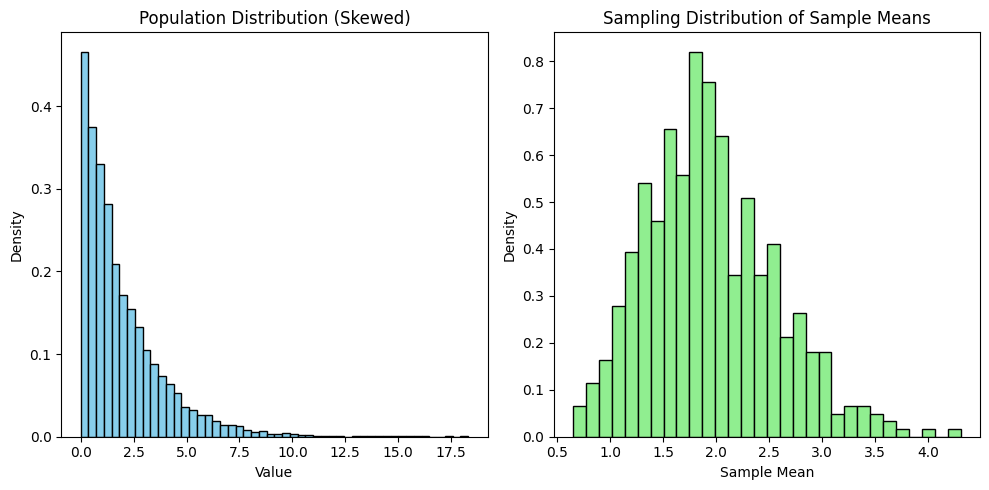

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate a non-normal population
population = np.random.exponential(scale = 2, size = 10000) # Skewed (right-tailed) population

# 2. Draw multiple samples and calculate sample means
sample_means = []  # To store the mean of each sample
smaple_size = 30  # Size of each sample
num_samples = 500  # Number of samples to draw


for _ in range(num_samples):
  sample = np.random.choice(population, size = sample_size, replace = False)   # Random sample
  sample_means.append(np.mean(sample))  # Calculate the mean of the sample

# 3. Visualize the population and sampling distributions
plt.figure(figsize = (10, 5))

# Plot the original population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins = 50, color = 'skyblue', edgecolor = 'black', density = True)
plt.title("Population Distribution (Skewed)")
plt.xlabel("Value")
plt.ylabel("Density")

# Plot the sampling distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins = 30, color = 'lightgreen', edgecolor = 'black', density = True)
plt.title("Sampling Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.tight_layout()
plt.show()